# Tópicos de Industria I
## Práctica 2 - Vuelos de Lévy

<img style="margin: 10px" src="./public/banner.png" alt="Assignment Banner" height="180" width="980" />

**E-mail:** roberto.carrillo7958@alumnos.udg.mx
**Ciclo:** 2023-A

## Vuelos de Lévy

Como parte de 

## MODULES

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go

from scipy.stats import levy_stable, wrapcauchy, norm, uniform


## CLASSES

In [3]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
    and also provides a bunch of high level functions
    """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen
* Visualizar con **plotly**

* Parametros m = 3.0, Levy_exponent = x, beta = 0

<img style="margin: 10px" src="./public/levy_dist.png" alt="Assignment Banner" height="180" width="480" />

## Implementación
El primer paso es definir los parámetros iniciales, lo cual nos permitirá generar la gráfica deseada. Dichos parámetros son los siguientes:

 * **Resolución**: Número de pasos dentro del rango
 * **Levy Exponent**: Conocido también como exponente $\alpha$, es el parámetro que determina la estabilidad de la distribución. Entre más grande su valor, la distribución se vuelve más estable, es decir, sus valores van a estar menos agrupados en el centro.
 * **Beta**: Conocido también como parámetro de asimetría. Entre más grande su valor, la distribución va a estar más inclinada hacia un lado del eje. Para generar gráficas simétricas, se define el valor como $0$.
 * **Aux Domain**: Vector auxiliar para generar las gráficas y los valores de distribución. De $-\pi$ a $\pi$

Se establece un arreglo de diferentes exponentes para generar una curva para cada exponente, y observar el comportamiento de $\alpha$. Para realizar la generación de la gráfica, es necesario generar un nuevo vector con los valores de probabilidad de Levy en cada punto del vector auxiliar que se ha definido en los parámetros.

Con el propósito de modularizar las implementaciones de la práctica, se definirán funciones para la creación de la curva y la gráfica.

In [26]:
# FUNCIONES AUXILIARES

# Definiendo función para generar función de densidad de probabilidad de Levy
def levy_stable_pdf_exp(Levy_exp, beta, x_vector):
  return np.array([levy_stable.pdf(i, Levy_exp, beta) for i in x_vector])


# Función de renderizado de gráfica
def plot_levy_stable_pdf(figure, x_vector, levy_stable_pdf, plotname):
  figure.add_trace(go.Scatter( 
    x = x_vector,
    y = levy_stable_pdf,
    marker = dict(size=2),
    line = dict(width=2),
    mode = 'lines',
    name = plotname,
  ))

def plot_3d_trajectory(
  trajectory,
  aux_zdomain,
  plot_name,
  tracename,
  has_start_end_markers=False,
  figure=go.Figure(),
  height=800,
  width=800
):
  # Plot Trajectory Settings
    figure.add_trace(go.Scatter3d(
        x = trajectory.x_pos,
        y = trajectory.y_pos,
        z = aux_zdomain,
        line=dict(width=3),
        name=tracename,
        showlegend = True,
        mode="lines",
    ))
    if(has_start_end_markers):
      # Plot Start point Settings
      figure.add_trace(go.Scatter3d(
          x = [trajectory["x_pos"].iloc[0]],
          y = [trajectory["y_pos"].iloc[0]],
          z = [aux_zdomain[0]],
          name="Levy_Flight_2D_Start",
          mode="markers",
          showlegend = True
      ))
      # Plot End Point Settings
      figure.add_trace(go.Scatter3d(
          x = [trajectory["x_pos"].iloc[-1]],
          y = [trajectory["y_pos"].iloc[-1]],
          z = [aux_zdomain[-1]],
          name="Levy_Flight_2D_End",
          mode="markers",
          showlegend = True
      ))

    
    # Plot camera and size/text settings
    figure.update_layout(
      title_text = plot_name,
      autosize = False,
      width = width,
      height = height,
      scene_camera = dict(
          center = dict( x=0, y=0, z=0 ),
          eye = dict( x=0, y=0, z=2.5 ),
      ),
      scene = dict(
          xaxis = dict(title='x_pos (mm)'),
          yaxis = dict(title='y_pos (mm)'),
          zaxis = dict(title='time', nticks = 20),
    ))

In [104]:
# Parámetros Iniciales

# Resolución o n_steps
resolution = 500
# Definiendo vector auxiliar
aux_domain = np.linspace(-np.pi, np.pi, resolution) # Puede tener un rango mucho mayor debido a que es long tailed
# Definiendo un conjunto de exponentes para generar diferentes distribuciones
Levy_Exps = [0.1, 0.4, 0.6, 1.0, 1.9]
# CRW Figure
fig_levy_stable_pdf = go.Figure()

for exp in Levy_Exps:
  levy_stable_pdf = levy_stable_pdf_exp(exp, beta=0, x_vector=aux_domain)
  plot_levy_stable_pdf(fig_levy_stable_pdf, aux_domain, levy_stable_pdf, f'levy_{exp}')

fig_levy_stable_pdf.update_layout(title_text='Levy_Stable Density Functions at different exponents')
fig_levy_stable_pdf.show()


## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF
* Visualizar con **matplotlib**

## Implementación

El primer paso, como en la mayoría de los procesos de graficado de distribuciones, es definir los parámetros iniciales, los cuales son los mismos utilizados en la actividad anterior. A continuación, inicializamos un plot de *matplotlib*, y creamos dos variables para agregar a la gráfica:

 * **levy_stable_pdf**: Función de densidad de probabilidad, lo cual se representará como una línea suave
 * **levy_stable_data**: Una muestra de valores aleatorios que serán agrupados en conjuntos para agregarse a un histograma. En teoría, los grupos tienen que asemejar la curva de la función

 Finalmente, se genera la gráfica, como se muestra:

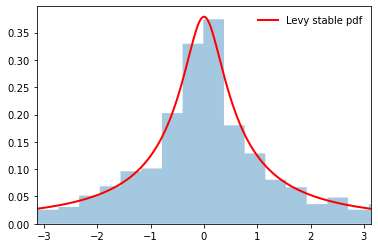

In [9]:
# Parámetros Iniciales

# Resolución o n_steps
resolution = 1500
# Exponente de levy
levy_exp = 0.75
# Beta
beta = 0
# Definiendo vector auxiliar
aux_domain = np.linspace(-np.pi, np.pi, resolution)
# CRW Figure
fig_Levy_pdf_histogram, ax = plt.subplots(1,1)

# Definiendo función para generar la curva de distribución de levy
levy_stable_pdf = levy_stable_pdf_exp(levy_exp, beta, aux_domain)
# Definiendo la muestra de datos aleatorios, puede ser mayor que el dominhio de x
levy_stable_data = levy_stable.rvs(levy_exp, beta, size=resolution)

# Gráfica con Matplotlib
ax.set_xlim(aux_domain[0], aux_domain[-1])
ax.plot(aux_domain, levy_stable_pdf, 'r-', lw=2, label="Levy stable pdf")
ax.hist(levy_stable_data, density=True, bins='auto', histtype='stepfilled', alpha=0.4)
ax.legend(loc='best', frameon=False)



## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**

## Implementación

Para generar una trayectoria de caminado aleatorio de tipo Vuelo de Lévy, el primer paso es  determinar los parámetros y comprender cómo se realizarán los giros de trayectoria. Recordando las características de los vuelos de Levy, tenemos lo siguiente:

 * Dirección con distribución normal
 * Longitud de paso aleatorio (determinado con una muestra de levy)
 * Distribución de cola larga

Tomando en cuenta las características, se crea una función para generar una trayectoria, utilizando los parámetros básicos para una muestra de Levy flight *(no. de pasos, alpha, beta)*, y posteriormente se crea un dataFrame que va guardando la posición en $x$ y $y$ de la trayectoria. Finalmente, la trayectoria se renderiza en un plano 3D con plotly.

In [33]:
# Definición de Función para generar trayectoria
def gen_levy_trajectory(start_pos=[0,0], n_steps=500, levy_exp=0.5, beta=0):
    # Init Vector
    vector = Vec2d(levy_exp, 0)

    # Init output dataframe with their corresponding names and start position
    levy_2d_df = pd.DataFrame(columns=['x_pos', 'y_pos'])
    temp_df = pd.DataFrame([{ 
        'x_pos': start_pos[0], 
        'y_pos': start_pos[1], 
    }])
    levy_2d_df = pd.concat([levy_2d_df, temp_df], ignore_index=True)

    # Create two random value samples:
    #   - We need a normal sample to calculate the angle for the steps
    #   - A levy rvs to determine the step length
    angle = np.array(wrapcauchy.rvs(levy_exp, size=n_steps))
    levy_rvs = np.array(levy_stable.rvs(levy_exp, beta, size=n_steps))

    for i in range(n_steps - 1):
        # Create angle of rotation with the angle defined above using the rotated helper from Vec2d
        next_pos =  vector.rotated(angle[i])
        # Add coordinates to temporary dataframe, adding the previous position with the new position,
        # as well as add the corresponding step length to the position
        next_pos_df = pd.DataFrame([{
            'x_pos': levy_2d_df.x_pos[i] + (np.abs(levy_rvs[i]) * next_pos.x),
            'y_pos': levy_2d_df.y_pos[i] + (np.abs(levy_rvs[i]) * next_pos.y)
        }])
        # Concatenate old coordinates with new coordinates
        levy_2d_df = pd.concat([levy_2d_df, next_pos_df], ignore_index=True)
    
    return levy_2d_df


def plot_levy_trajectory(figure=go.Figure(), start_pos=[0,0], n_steps=500, levy_exp=0.5, beta=0):
    # Call function to generate the Levy Flight trajectory
    levy_trajectory = gen_levy_trajectory(start_pos, n_steps, levy_exp, beta)
    # Create aux z vector
    aux_zdomain = np.linspace(0,1, n_steps)
    plot_3d_trajectory(
        levy_trajectory, 
        aux_zdomain, 
        "Levy Flight 2D Trajectory", 
        "Levy_Flight_2D", 
        True, 
        figure
    )
    

In [34]:
# Initial Params
n_steps = 10000
s_pos = [0,0]
levy_exp = 0.7
beta = 0

# Generate the plot figure
fig_levy_flight_3d = go.Figure()

# Call function to create the 3d plot  
plot_levy_trajectory(fig_levy_flight_3d, s_pos, n_steps, levy_exp, beta)
fig_levy_flight_3d.show()


## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable n_traj
* Cada una de las trayectorias debe tener un coeficiente de Cauchy diferente
* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**
* Exportar trayectorias como *pkl*


## Implementación

El primer paso, es generar una función que cree una trayectoria de CRW, con sus respectivos parámetros *(posición inicial, número de pasos, coeficiente)*. Dicha funcion tiene que retornar un dataFrame con las posiciones de la trayectoria. El siguiente paso, es generar un ciclo for que va a iterar sobre un arreglo de $n$ coeficientes, que realiza las siguientes acciones:

 1. Crea un dataFrame con el coeficiente actual llamando la función que se creó.
 2. Concatena el dataFrame creado en otro dataFrame que guardará las trayectorias para su posterior exportación.
 3. Genera una gráfica en 3D para cada trayectoria

Finalmente, el dataFrame con todas las trayectorias se exporta como *.pkl*

In [120]:
# Definición de Función para generar trayectoria CRW
def gen_crw_trajectory(start_pos=[0,0], n_steps=500, coefficient=0.3):
    # Init Vector
    vector = Vec2d(coefficient, 0)

    # Init output dataframe with their corresponding names and start position
    crw_2d_df = pd.DataFrame(columns=['x_pos', 'y_pos'])
    temp_df = pd.DataFrame([{ 
        'x_pos': start_pos[0], 
        'y_pos': start_pos[1], 
    }])
    crw_2d_df = pd.concat([crw_2d_df, temp_df], ignore_index=True)

    # Create cauchy rvs with coefficient
    cauchy_rvs = np.array(wrapcauchy.rvs(coefficient, size=n_steps))

    for i in range(n_steps - 1):
        # Create angle of rotation with the angle defined above using the rotated helper from Vec2d
        next_pos =  vector.rotated(cauchy_rvs[i])
        # Add coordinates to temporary dataframe, adding the previous position with the new position,
        # as well as add the corresponding step length to the position
        next_pos_df = pd.DataFrame([{
            'x_pos': crw_2d_df.x_pos[i] + next_pos.x,
            'y_pos': crw_2d_df.y_pos[i] + next_pos.y
        }])
        # Concatenate old coordinates with new coordinates
        crw_2d_df = pd.concat([crw_2d_df, next_pos_df], ignore_index=True)
    
    return crw_2d_df


In [142]:
# Parámetros iniciales
n_trajs = [0.1, 0.3, 0.6, 0.9]
n_steps = 1000
s_pos = [0,0]
aux_zdomain = np.linspace(0,1, n_steps)

crw_3d_plot = go.Figure()
crw_master_df = pd.DataFrame(columns=["traj_name", "traj_data"])

# Create and plot CRW Trajectory for every coefficient
for coefficient in n_trajs:
    current_trajectory = gen_crw_trajectory(s_pos, n_steps, coefficient)
    
    traj_name = f"CRW_exp_{coefficient}"
    master_df_temp = pd.DataFrame([{ "traj_name": traj_name, "traj_data": current_trajectory }])
    crw_master_df = pd.concat([crw_master_df, master_df_temp], ignore_index=True)
    plot_3d_trajectory(
        trajectory=current_trajectory, 
        aux_zdomain=aux_zdomain, 
        plot_name="Correlated Random Walks with different exponents", 
        tracename=traj_name,
        has_start_end_markers=False,
        figure=crw_3d_plot
    )

crw_3d_plot.show()
crw_master_df.to_pickle("./trajectories/crw_multiple_exps.pkl")


## Conclusiones

Como conclusiones, podemos observar cómo los vuelos de Levy son un tipo de caminatas aleatorias con características similares al movimiento Browniano, y al mismo tiempo diferentes, que pueden ser observadas tanto en sus funciones de densidad de probabilidad, como en las trayectorias mismas. Es importante conocer cómo éste tipo de caminatas se presentan en muchos aspectos de la naturaleza, tanto animales, como seres humanos, o la tierra misma; así como en una gran cantidad de campos, tales como la física, biología, astronomía, entre muchas otras.

La actividad reforzó los conceptos de las PDF (Probability Density Functions), así como los conceptos clave en la generación de caminados aleatorios, y el impacto que los parámetros tienen en los mismos.

## Referencias

 * [Distribución estable](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_estable)
 * [Lévy Flights & Random Walks](https://blogs.sas.com/content/iml/2021/02/01/levy-random-walk.html)
 * [Lévy Flights](https://en.wikipedia.org/wiki/L%C3%A9vy_flight)
 * [Scipy Stats Levy_Stable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levy_stable.html)